# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


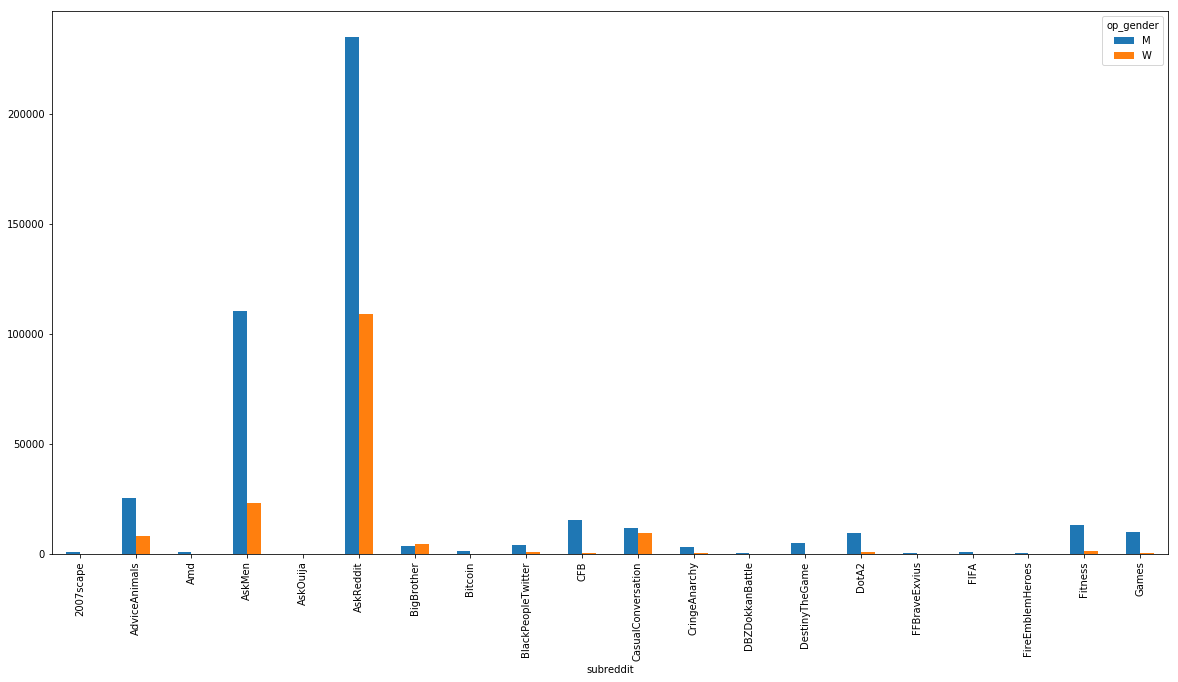

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
67,2,video,57265377,Roger Williams,Congress_Republican,M,Heather,#TBT to this classic video. #DonkeyWhisperer,"US Representative Roger Williams, as one of yo..."
372,15,video,57265377,Roger Williams,Congress_Republican,M,Edward,President Trump is checking off his campaign p...,This wall was approved by Congress in 2006. Ab...
617,19,video,57265377,Roger Williams,Congress_Republican,M,Samantha,"Since its inception, Obamacare has been an abs...",It has not been a nightmare. Living without in...
787,19,video,57265377,Roger Williams,Congress_Republican,M,Elisa,"Since its inception, Obamacare has been an abs...",I am one of your constituents. My husband is ...
1217,32,video,57265377,Roger Williams,Congress_Republican,M,Cornelio,"In Texas, we're proud to say Merry Christmas.",I could give a flying FUCK if you say Merry Ch...


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17127
photo     14425
status     9787
video      8585
event        56
note         16
music         4
Name: post_type, dtype: int64
Congress_Republican     31724
Congress_Democratic     17064
Congress_Independent      675
                          537
Name: op_category, dtype: int64
M    37530
W    12470
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
67,2,video,57265377,Roger Williams,Congress_Republican,M,Heather,#TBT to this classic video. #DonkeyWhisperer,"US Representative Roger Williams, as one of yo...","[#, TBT, to, this, classic, video, ., #, Donke...","[US, Representative, Roger, Williams, ,, as, o...",9,32
372,15,video,57265377,Roger Williams,Congress_Republican,M,Edward,President Trump is checking off his campaign p...,This wall was approved by Congress in 2006. Ab...,"[President, Trump, is, checking, off, his, cam...","[This, wall, was, approved, by, Congress, in, ...",28,15
617,19,video,57265377,Roger Williams,Congress_Republican,M,Samantha,"Since its inception, Obamacare has been an abs...",It has not been a nightmare. Living without in...,"[Since, its, inception, ,, Obamacare, has, bee...","[It, has, not, been, a, nightmare, ., Living, ...",28,96
787,19,video,57265377,Roger Williams,Congress_Republican,M,Elisa,"Since its inception, Obamacare has been an abs...",I am one of your constituents. My husband is ...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, am, one, of, your, constituents, ., My, hu...",28,88
1217,32,video,57265377,Roger Williams,Congress_Republican,M,Cornelio,"In Texas, we're proud to say Merry Christmas.",I could give a flying FUCK if you say Merry Ch...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[I, could, give, a, flying, FUCK, if, you, say...",11,40


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.763069544364505
average post length when poster is female: 77.50737770649559


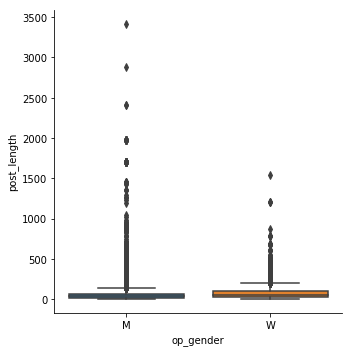

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [42]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                        \
                count       mean         std  min   25%   50%   75%     max   
op_gender                                                                     
M             37530.0  58.763070  101.176518  0.0  19.0  35.0  67.0  3419.0   
W             12470.0  77.507378   81.551686  0.0  27.0  53.0  95.0  1542.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37530.0  31.820783  64.858749  0.0  7.0  15.0  34.0  1495.0  
W                 12470.0  31.769206  66.078066  0.0  7.0  15.0  34.0  1633.0

average response length when poster is male: 31.82078337330136
average response length when poster is female: 31.769206094627105


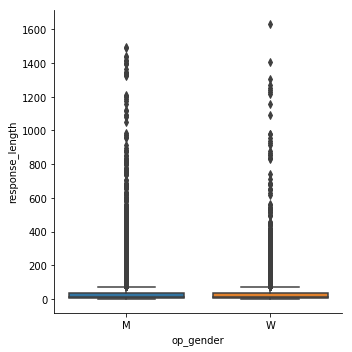

In [43]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [44]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [46]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
67,2,video,57265377,Roger Williams,Congress_Republican,M,Heather,#TBT to this classic video. #DonkeyWhisperer,"US Representative Roger Williams, as one of yo...","[#, TBT, to, this, classic, video, ., #, Donke...","[US, Representative, Roger, Williams, ,, as, o...",9,32,4.500000,16.000000
372,15,video,57265377,Roger Williams,Congress_Republican,M,Edward,President Trump is checking off his campaign p...,This wall was approved by Congress in 2006. Ab...,"[President, Trump, is, checking, off, his, cam...","[This, wall, was, approved, by, Congress, in, ...",28,15,14.000000,7.500000
617,19,video,57265377,Roger Williams,Congress_Republican,M,Samantha,"Since its inception, Obamacare has been an abs...",It has not been a nightmare. Living without in...,"[Since, its, inception, ,, Obamacare, has, bee...","[It, has, not, been, a, nightmare, ., Living, ...",28,96,9.333333,12.000000
787,19,video,57265377,Roger Williams,Congress_Republican,M,Elisa,"Since its inception, Obamacare has been an abs...",I am one of your constituents. My husband is ...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, am, one, of, your, constituents, ., My, hu...",28,88,9.333333,12.571429
1217,32,video,57265377,Roger Williams,Congress_Republican,M,Cornelio,"In Texas, we're proud to say Merry Christmas.",I could give a flying FUCK if you say Merry Ch...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[I, could, give, a, flying, FUCK, if, you, say...",11,40,11.000000,20.000000


In [47]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                        \
                  count       mean       std  min        25%   50%        75%   
op_gender                                                                       
M               35348.0  17.896804  9.023153  1.0  11.666667  17.0  22.750000   
W               12124.0  19.363397  8.263968  1.0  13.500000  18.5  24.333333   

                 response_avg_slen                                            \
             max             count       mean        std  min  25%       50%   
op_gender                                                                      
M          266.0           37094.0  11.767403  11.072145  1.0  5.0  9.500000   
W           86.0           12343.0  11.530757  10.644779  1.0  5.0  9.333333   

                        
            75%    max  
op_gender               
M          15.0  450.0  
W          15.0  411.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Should we add a TTR column?

In [48]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [49]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [50]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [51]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [52]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
67,2,video,57265377,Roger Williams,Congress_Republican,M,Heather,#TBT to this classic video. #DonkeyWhisperer,"US Representative Roger Williams, as one of yo...","[#, TBT, to, this, classic, video, ., #, Donke...","[US, Representative, Roger, Williams, ,, as, o...",9,32,4.500000,16.000000,1.250000,3.555556
372,15,video,57265377,Roger Williams,Congress_Republican,M,Edward,President Trump is checking off his campaign p...,This wall was approved by Congress in 2006. Ab...,"[President, Trump, is, checking, off, his, cam...","[This, wall, was, approved, by, Congress, in, ...",28,15,14.000000,7.500000,2.583333,1.615385
617,19,video,57265377,Roger Williams,Congress_Republican,M,Samantha,"Since its inception, Obamacare has been an abs...",It has not been a nightmare. Living without in...,"[Since, its, inception, ,, Obamacare, has, bee...","[It, has, not, been, a, nightmare, ., Living, ...",28,96,9.333333,12.000000,3.227273,2.223529
787,19,video,57265377,Roger Williams,Congress_Republican,M,Elisa,"Since its inception, Obamacare has been an abs...",I am one of your constituents. My husband is ...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, am, one, of, your, constituents, ., My, hu...",28,88,9.333333,12.571429,3.227273,1.986667
1217,32,video,57265377,Roger Williams,Congress_Republican,M,Cornelio,"In Texas, we're proud to say Merry Christmas.",I could give a flying FUCK if you say Merry Ch...,"[In, Texas, ,, we, 're, proud, to, say, Merry,...","[I, could, give, a, flying, FUCK, if, you, say...",11,40,11.000000,20.000000,2.625000,2.515152


In [53]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35263.0  2.425595  0.832137  1.0  1.920000  2.317073   
W                12083.0  2.365364  0.707607  1.0  1.930771  2.271186   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.742857  18.0            36311.0  2.754598  2.204441  1.0   
W          2.692308  11.0            12076.0  2.767926  2.157586  1.0   

                                          
                25%       50%  75%   max  
op_gender                                 
M          1.644444  2.198020  3.0  20.0  
W          1.666667  2.208333  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [54]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [55]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [56]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
11,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sherri,Tornado watch in effect tonight. Be safe. Plea...,Melissa Tortorelli i live in Wilmington too,"[Tornado, watch, in, effect, tonight, ., Be, s...","[Melissa, Tortorelli, i, live, in, Wilmington,...",22,7
315,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sandra,Protect your plants away from the lake tonight...,Thank you 👍🏻,"[Protect, your, plants, away, from, the, lake,...","[Thank, you, 👍🏻]",40,3
649,67,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Severe weather is possible this afternoon. Tor...,[[STICKER]],"[Severe, weather, is, possible, this, afternoo...","[[, [, STICKER, ], ]]",53,5
779,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Leona,"Hello it's Baseball time! Uh, but there's a ch...","Byron, I rebuke the thought of snow! Nope! Not...","[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Byron, ,, I, rebuke, the, thought, of, snow, ...",69,13
1008,103,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carrie,,Awesome! That is our friend Kathi's daughter!!...,[],"[Awesome, !, That, is, our, friend, Kathi, 's,...",0,22


average post length when poster is male: 38.2154486251809
average post length when poster is female: 28.584869523581517


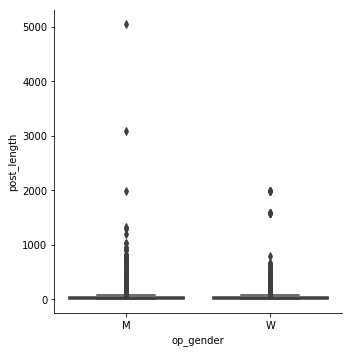

In [57]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 15.116377231066087
average response length when poster is female: 13.31095882212114


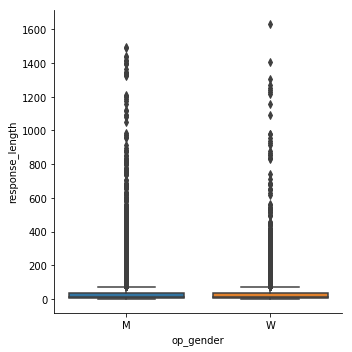

In [58]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [59]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16584.0  38.215449  86.508792  0.0  6.0  17.0  34.0  5055.0   
W             33416.0  28.584870  55.097979  0.0  8.0  20.0  32.0  1978.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16584.0  15.116377  36.090885  0.0  3.0  7.0  15.0  1572.0  
W                 33416.0  13.310959  30.302848  0.0  3.0  6.0  13.0  1485.0

In [60]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [61]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [62]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
11,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sherri,Tornado watch in effect tonight. Be safe. Plea...,Melissa Tortorelli i live in Wilmington too,"[Tornado, watch, in, effect, tonight, ., Be, s...","[Melissa, Tortorelli, i, live, in, Wilmington,...",22,7,7.333333,7.000000
315,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sandra,Protect your plants away from the lake tonight...,Thank you 👍🏻,"[Protect, your, plants, away, from, the, lake,...","[Thank, you, 👍🏻]",40,3,6.666667,3.000000
649,67,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Severe weather is possible this afternoon. Tor...,[[STICKER]],"[Severe, weather, is, possible, this, afternoo...","[[, [, STICKER, ], ]]",53,5,8.833333,5.000000
779,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Leona,"Hello it's Baseball time! Uh, but there's a ch...","Byron, I rebuke the thought of snow! Nope! Not...","[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Byron, ,, I, rebuke, the, thought, of, snow, ...",69,13,9.857143,4.333333
1008,103,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carrie,,Awesome! That is our friend Kathi's daughter!!...,[],"[Awesome, !, That, is, our, friend, Kathi, 's,...",0,22,NaN,5.500000


In [63]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                   \
                  count       mean        std  min  25%       50%    75%   
op_gender                                                                  
M               14840.0  11.837741  10.045936  1.0  6.0  9.666667  15.60   
W               29513.0  10.946357   9.060255  1.0  7.0  9.666667  13.75   

                 response_avg_slen                                           \
             max             count      mean        std  min  25%  50%  75%   
op_gender                                                                     
M          424.0           16532.0  7.551807   8.506075  1.0  3.0  5.0  9.5   
W          527.0           33304.0  7.298038  11.202429  1.0  2.5  5.0  9.0   

                       
                  max  
op_gender              
M          307.333333  
W          666.000000

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

In [64]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
11,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sherri,Tornado watch in effect tonight. Be safe. Plea...,Melissa Tortorelli i live in Wilmington too,"[Tornado, watch, in, effect, tonight, ., Be, s...","[Melissa, Tortorelli, i, live, in, Wilmington,...",22,7,7.333333,7.000000,2.111111,3.500000
315,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sandra,Protect your plants away from the lake tonight...,Thank you 👍🏻,"[Protect, your, plants, away, from, the, lake,...","[Thank, you, 👍🏻]",40,3,6.666667,3.000000,2.862069,1.500000
649,67,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Severe weather is possible this afternoon. Tor...,[[STICKER]],"[Severe, weather, is, possible, this, afternoo...","[[, [, STICKER, ], ]]",53,5,8.833333,5.000000,3.046512,9.000000
779,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Leona,"Hello it's Baseball time! Uh, but there's a ch...","Byron, I rebuke the thought of snow! Nope! Not...","[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Byron, ,, I, rebuke, the, thought, of, snow, ...",69,13,9.857143,4.333333,2.245283,4.500000
1008,103,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carrie,,Awesome! That is our friend Kathi's daughter!!...,[],"[Awesome, !, That, is, our, friend, Kathi, 's,...",0,22,NaN,5.500000,NaN,2.466667


In [65]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14568.0  2.765625  1.782569  1.0  1.808306  2.390244   
W                28977.0  2.613296  1.486222  1.0  1.750000  2.309524   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.111111  18.0            15010.0  3.545094  3.355861  1.0   
W          3.047619  20.0            30408.0  3.909368  3.857764  1.0   

                                          
                25%       50%  75%   max  
op_gender                                 
M          1.545455  2.333333  4.0  20.0  
W          1.571429  2.416667  4.5  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [66]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [67]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet..."
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...
41,41,117,M,60053,M,L-carnitine and/or asparagus make your pee sme...,Asparagus makes my pee smell ... dry. Or maybe...
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [68]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...,"[>, tfw, you, 're, more, excited, about, the, ...","[I, thought, this, was, every, Friday, night, ...",46,10
41,41,117,M,60053,M,L-carnitine and/or asparagus make your pee sme...,Asparagus makes my pee smell ... dry. Or maybe...,"[L-carnitine, and/or, asparagus, make, your, p...","[Asparagus, makes, my, pee, smell, ..., dry, ....",12,21
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3


In [69]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                     \
                count       mean        std  min  25%   50%   75%    max   
op_gender                                                                  
M             27098.0  17.069858  19.667191  1.0  7.0  10.0  20.0  880.0   
W             22902.0  18.687582  20.283452  1.0  8.0  11.0  22.0  474.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27098.0  24.638387  29.000186  1.0  6.0  12.0  29.0  495.0  
W                 22902.0  27.771767  31.165080  1.0  6.0  13.0  36.0  352.0

In [70]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12327.0  16.370163  18.706448  1.0  5.0  10.0   
          W                 14771.0  31.538555  33.855820  1.0  6.0  14.0   
W         M                 11897.0  15.808271  17.976797  1.0  5.0  10.0   
          W                 11005.0  40.704952  36.741808  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 20.0  495.0  
          W                 59.0  227.0  
W         M                 19.0  352.0  
          W                 86.0  300.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [71]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [72]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [73]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55,7.0,27.5
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...,"[>, tfw, you, 're, more, excited, about, the, ...","[I, thought, this, was, every, Friday, night, ...",46,10,46.0,10.0
41,41,117,M,60053,M,L-carnitine and/or asparagus make your pee sme...,Asparagus makes my pee smell ... dry. Or maybe...,"[L-carnitine, and/or, asparagus, make, your, p...","[Asparagus, makes, my, pee, smell, ..., dry, ....",12,21,6.0,7.0
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3,10.0,3.0


In [74]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                       \
                  count      mean       std  min  25%  50%        75%    max   
op_gender                                                                      
M               27098.0  9.211444  6.485548  1.0  5.0  8.0  10.666667  120.0   
W               22902.0  9.299502  6.226653  1.0  5.5  8.0  10.500000  106.0   

          response_avg_slen                                                   
                      count       mean       std  min  25%  50%   75%    max  
op_gender                                                                     
M                   27098.0   9.982833  8.609128  1.0  4.0  7.0  12.0  106.0  
W                   22902.0  10.596917  9.176745  1.0  4.0  7.5  13.0   89.0

In [75]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12327.0   8.311753   6.441239  1.0  4.0   
          W                 14771.0  11.377417   9.852671  1.0  4.0   
W         M                 11897.0   7.905143   6.131595  1.0  4.0   
          W                 11005.0  13.506871  10.877179  1.0  5.0   

                                  50%   75%    max  
op_gender responder_gender                          
M         M                  6.500000  11.0   83.0  
          W                  7.333333  14.5  106.0  
W         M                  6.000000  10.0   89.0  
          W                 10.000000  23.0   58.0

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

In [76]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0,2.000000,NaN
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55,7.0,27.5,6.000000,1.478261
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...,"[>, tfw, you, 're, more, excited, about, the, ...","[I, thought, this, was, every, Friday, night, ...",46,10,46.0,10.0,3.228571,1.333333
41,41,117,M,60053,M,L-carnitine and/or asparagus make your pee sme...,Asparagus makes my pee smell ... dry. Or maybe...,"[L-carnitine, and/or, asparagus, make, your, p...","[Asparagus, makes, my, pee, smell, ..., dry, ....",12,21,6.0,7.0,3.333333,2.800000
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3,10.0,3.0,2.500000,1.000000


In [77]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                    \
                   count      mean       std  min  25%       50%       75%   
op_gender                                                                    
M                26862.0  2.404087  1.411506  1.0  1.4  2.083333  3.055556   
W                22769.0  2.279448  1.228133  1.0  1.4  2.000000  3.000000   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            26252.0  2.349136  1.965869  1.0  1.333333   
W          19.0            22250.0  2.288063  1.910925  1.0  1.360000   

                                     
                50%       75%   max  
op_gender                            
M          1.739130  2.555556  20.0  
W          1.733333  2.461538  20.0

In [78]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 11947.0  2.520450  2.115710  1.0  1.333333   
          W                 14305.0  2.206061  1.819109  1.0  1.372881   
W         M                 11489.0  2.420104  2.144795  1.0  1.250000   
          W                 10761.0  2.147089  1.612698  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.950000  2.850000  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.800000  2.703704  20.0  
          W                 1.650794  2.171429  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [79]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [80]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work..."
73,73,2007scape,Jorfogit,M,False,komikeren,,unknown_gender,I was one of the high-rollers in the PVM commu...,"I agree, but still, the update hit the PVP com..."
77,77,2007scape,SlayerMaster,M,False,SanfewOfFi,,unknown_gender,"Careful, he might try to lure you!",Not sure how srs.
159,159,2007scape,Haineserino,M,False,EdHicks,,unknown_gender,Omg... Thats tragic :o,He seemed pretty chill after it. Just sat ther...


In [81]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level,"[Black, DHide, legs, ,, possibly, an, initiate...","[So, ..., Low, level]",9,4
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38
73,73,2007scape,Jorfogit,M,False,komikeren,,unknown_gender,I was one of the high-rollers in the PVM commu...,"I agree, but still, the update hit the PVP com...","[I, was, one, of, the, high-rollers, in, the, ...","[I, agree, ,, but, still, ,, the, update, hit,...",44,22
77,77,2007scape,SlayerMaster,M,False,SanfewOfFi,,unknown_gender,"Careful, he might try to lure you!",Not sure how srs.,"[Careful, ,, he, might, try, to, lure, you, !]","[Not, sure, how, srs, .]",9,5
159,159,2007scape,Haineserino,M,False,EdHicks,,unknown_gender,Omg... Thats tragic :o,He seemed pretty chill after it. Just sat ther...,"[Omg, ..., Thats, tragic, :, o]","[He, seemed, pretty, chill, after, it, ., Just...",6,39


average post length when poster is male: 39.868574028206034
average post length when poster is female: 47.027218708069775


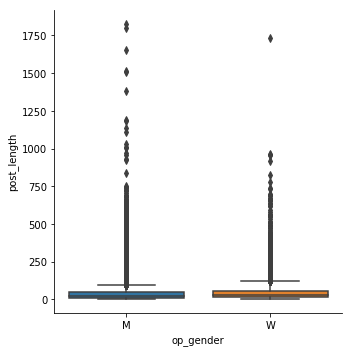

In [82]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 33.95824697973007
average response length when poster is female: 37.75771516197048


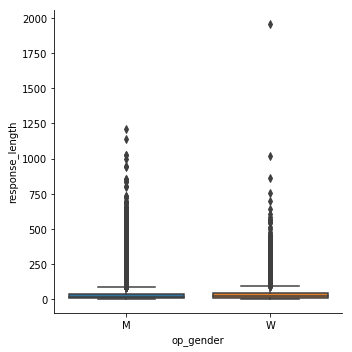

In [83]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [84]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39566.0  39.868574  61.076299  1.0  11.0  22.0  45.0  1828.0   
W             10434.0  47.027219  67.398829  1.0  13.0  26.0  55.0  1731.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 39566.0  33.958247  50.486168  1.0  9.0  19.0  40.0  1212.0  
W                 10434.0  37.757715  56.849907  1.0  9.0  21.0  44.0  1959.0

In [85]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min   25%   50%  \
op_gender responder_gender                                                   
M                           36022.0  33.683638  50.324675  1.0   9.0  19.0   
          M                  2780.0  35.971583  52.904582  1.0  10.0  20.0   
          W                   764.0  39.579843  48.615270  1.0  11.0  24.0   
W                            9406.0  36.904954  53.301824  1.0   9.0  20.0   
          M                   753.0  45.743692  90.551116  1.0  11.0  25.0   
          W                   275.0  45.058182  52.755844  1.0  15.0  28.0   

                             75%     max  
op_gender responder_gender                
M                           39.0  1212.0  
          M                 42.0   858.0  
          W                 50.0   610.0  
W                           43.0  1019.0  
          M                 50.0  1959.0  
          W                 56.5   441.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [86]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [88]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level,"[Black, DHide, legs, ,, possibly, an, initiate...","[So, ..., Low, level]",9,4,9.0,4.000000
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38,11.5,12.666667
73,73,2007scape,Jorfogit,M,False,komikeren,,unknown_gender,I was one of the high-rollers in the PVM commu...,"I agree, but still, the update hit the PVP com...","[I, was, one, of, the, high-rollers, in, the, ...","[I, agree, ,, but, still, ,, the, update, hit,...",44,22,22.0,22.000000
77,77,2007scape,SlayerMaster,M,False,SanfewOfFi,,unknown_gender,"Careful, he might try to lure you!",Not sure how srs.,"[Careful, ,, he, might, try, to, lure, you, !]","[Not, sure, how, srs, .]",9,5,9.0,5.000000
159,159,2007scape,Haineserino,M,False,EdHicks,,unknown_gender,Omg... Thats tragic :o,He seemed pretty chill after it. Just sat ther...,"[Omg, ..., Thats, tragic, :, o]","[He, seemed, pretty, chill, after, it, ., Just...",6,39,6.0,19.500000


In [89]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                    \
                  count       mean       std  min  25%   50%   75%    max   
op_gender                                                                   
M               39566.0  13.533785  8.573994  1.0  8.0  12.0  17.5  210.0   
W               10434.0  13.796598  8.319996  1.0  8.0  12.4  18.0  125.0   

          response_avg_slen                                                     
                      count       mean       std  min  25%    50%   75%    max  
op_gender                                                                       
M                   39566.0  12.823892  9.274365  1.0  7.0  11.00  17.0  632.0  
W                   10434.0  12.848370  8.546009  1.0  7.0  11.25  17.0  104.0

In [90]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M                           36022.0  12.811038   9.357603  1.0  7.0   
          M                  2780.0  12.876541   7.907120  1.0  7.0   
          W                   764.0  13.238357   9.919307  1.0  7.0   
W                            9406.0  12.778957   8.526363  1.0  7.0   
          M                   753.0  13.250550   8.155460  1.0  8.0   
          W                   275.0  14.121312  10.037216  1.0  8.0   

                                  50%   75%    max  
op_gender responder_gender                          
M                           11.000000  17.0  632.0  
          M                 11.500000  17.0   75.0  
          W                 11.500000  17.0  175.0  
W                           11.000000  17.0  104.0  
          M                 12.000000  17.0   83.0  
          W                 12.333333  17.9  100.0

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

In [91]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level,"[Black, DHide, legs, ,, possibly, an, initiate...","[So, ..., Low, level]",9,4,9.0,4.000000,4.166667,1.000000
18,18,2007scape,Tazzak9028,M,False,phySi0,M,False,"If youre using 07, just click on the black par...","Dont know why youre being downvoted, this work...","[If, youre, using, 07, ,, just, click, on, the...","[Dont, know, why, youre, being, downvoted, ,, ...",23,38,11.5,12.666667,1.764706,1.586207
73,73,2007scape,Jorfogit,M,False,komikeren,,unknown_gender,I was one of the high-rollers in the PVM commu...,"I agree, but still, the update hit the PVP com...","[I, was, one, of, the, high-rollers, in, the, ...","[I, agree, ,, but, still, ,, the, update, hit,...",44,22,22.0,22.000000,1.416667,1.937500
77,77,2007scape,SlayerMaster,M,False,SanfewOfFi,,unknown_gender,"Careful, he might try to lure you!",Not sure how srs.,"[Careful, ,, he, might, try, to, lure, you, !]","[Not, sure, how, srs, .]",9,5,9.0,5.000000,4.142857,5.750000
159,159,2007scape,Haineserino,M,False,EdHicks,,unknown_gender,Omg... Thats tragic :o,He seemed pretty chill after it. Just sat ther...,"[Omg, ..., Thats, tragic, :, o]","[He, seemed, pretty, chill, after, it, ., Just...",6,39,6.0,19.500000,9.500000,1.771429


In [92]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                     \
                   count      mean       std  min   25%       50%       75%   
op_gender                                                                     
M                39120.0  2.539521  1.507594  1.0  1.75  2.231579  2.866667   
W                10315.0  2.454005  1.406761  1.0  1.75  2.181818  2.736346   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            38934.0  2.534817  1.636074  1.0  1.687500   
W          20.0            10264.0  2.460274  1.529772  1.0  1.679847   

                                     
                50%       75%   max  
op_gender                            
M          2.200000  2.857143  20.0  
W          2.155844  2.750000  20.0

In [93]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35437.0  2.539618  1.648334  1.0  1.684211   
          M                  2742.0  2.505476  1.492998  1.0  1.723342   
          W                   755.0  2.416041  1.549385  1.0  1.700000   
W                            9248.0  2.463823  1.541466  1.0  1.674557   
          M                   744.0  2.443296  1.504165  1.0  1.689116   
          W                   272.0  2.386058  1.156814  1.0  1.759655   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.200000  2.857143  20.0  
          M                 2.193265  2.836712  20.0  
          W                 2.111111  2.666667  20.0  
W                           2.153846  2.760000  20.0  
          M                 2.168239  2.692308  17.0  
          W                 2.172619  2.686508  11.0

Again, about the same.

### TED linguistic analysis

In [94]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [95]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [96]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128


average response length when poster is male: 94.27689033681888
average response length when poster is female: 91.51172725749707


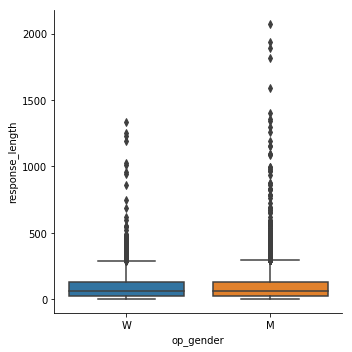

In [97]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when poster is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are longer when the speaker is male than when they are female. Let's look at some more detail:

In [98]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,38062.0,94.276890,98.586504,1.0,25.0,61.0,133.00,2074.0
W,11938.0,91.511727,94.739652,1.0,24.0,60.0,130.75,1331.0


In [99]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [101]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93,13.285714
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667


In [102]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,38062.0,18.529694,12.905110,1.0,11.416667,16.909091,22.900000,499.0
W,11938.0,18.009116,12.415601,1.0,11.000000,16.250000,22.333333,362.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker.

In [103]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000,2.155844
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000,1.312500
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000,2.179487
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93,13.285714,1.921053
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667,2.160000


In [104]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37818.0,2.259907,0.979239,1.0,1.788754,2.110024,2.485915,20.0
W,11851.0,2.251713,0.896696,1.0,1.790871,2.105263,2.500000,18.0


And once again, the google k-band doesn't really differ between genders.

## Machine Learning
Let's gather everything I want for machine learning! I want to focus on when we know the gender of the OP and the responder. Which files will work for this?

- Fitocracy: genders are present for all posters/responders
- Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [114]:
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [130]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78231 entries, 51026 to 1314987
Data columns (total 10 columns):
post_id                     78231 non-null int64
subreddit                   78231 non-null object
op_id                       78231 non-null object
op_gender                   78231 non-null object
op_gender_visible           78231 non-null bool
responder_id                78231 non-null object
responder_gender            78231 non-null object
responder_gender_visible    78231 non-null object
post_text                   78231 non-null object
response_text               78231 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 6.0+ MB


How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [131]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [132]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
51026,51026,Uphoria,M,QuixoticChemist,W,I agree with this. most guys wont think twice ...,I think theyre are a few males in my lab this ...,reddit
51028,51028,Uphoria,M,MobileD,M,I honestly wouldnt. There are two things to c...,Basically this. I would recommend holding off...,reddit
51029,51029,satinbirdy,W,ninjarxa,M,Such a classic question! Im not a guy but Ive ...,whenever you make contact with another person ...,reddit
51030,51030,phukka,M,BroccoliFarts,W,"If its a guy that you might see often, a co-wo...",He is a coworker but I only work with him thre...,reddit
51031,51031,BroccoliFarts,W,phukka,M,He is a coworker but I only work with him thre...,"Also, watch how he interacts with his other co...",reddit


In [142]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [143]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 7 columns):
op_id               396766 non-null object
op_gender           396766 non-null object
responder_id        396766 non-null object
responder_gender    396766 non-null object
post_text           396766 non-null object
response_text       396766 non-null object
source              396766 non-null object
dtypes: object(7)
memory usage: 21.2+ MB


In [147]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [148]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667


Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [149]:
import pickle

gender_visible_df.to_pickle("gender_visible_df.pkl")